In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
data = pd.read_csv("/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


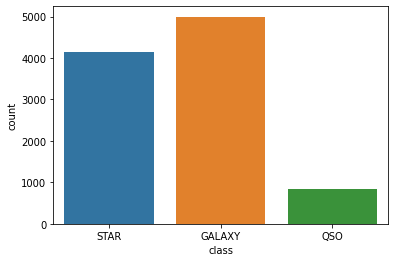

In [4]:
sns.countplot(x=data['class'])

In [5]:
def change_category_to_number(classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2

In [6]:
data['classCat'] = data['class'].apply(change_category_to_number)

In [ ]:
sns.pairplot(data[['u','g','r','i']])

In [ ]:
sns.pairplot(data[['run','rerun','camcol','field']])

In [9]:
data.drop(['run','rerun','camcol','field','class'],axis=1,inplace=True)

In [10]:
X = data.drop('classCat', axis=1)
y = data['classCat']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [12]:
lrClassifier = LogisticRegression()

In [13]:
lrClassifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [14]:
prediction = lrClassifier.predict(X_test)

In [15]:
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y_test[:10]

7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

In [17]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.41233333333333333